In [1]:
import pandas as pd

from data.constants import T5_V3_OUTPUT_FILE_PATH
t5_v3_df = pd.read_csv(T5_V3_OUTPUT_FILE_PATH)

In [2]:
t5_v3_df

,Sequence,True_Label,Predicted_Label
0,MFIEAIVLALTALILYSVYSVKSFNTTRPTDPPVYPVTVPFLGHIV...,O=C(NCC(c1ccccc1)n1ccnc1)c1ccc(-c2ccc(Cl)cc2)cc1,=C(Oc(=1ccc((1)Nccccc1)c1cccc-c2ccccCl)cc2)cc1
1,MDSSTGPGNTSDCSDPLAQASCSPAPGSWLNLSHVDGNQSDPCGLN...,CN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](O)CC[C@H]...,CC[CC[C@H(C2c(c(ccO)ccc[C@H](OC@HH](C)[[C@@](O...
2,MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESN...,C[C@]12O[C@H](C[C@]1(O)CO)n1c3ccccc3c3c4c(c5c6...,CcC@]12O[C@H](C[C@]1(O)CO)n1c3ccccc3c3c4c(c5c6...
3,MELENIVANSLLLKARQGGYGKKSGRSKKWKEILTLPPVSQCSELR...,CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1...,CcC@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1(...
4,MAALSGGGGGGAEPGQALFNGDMEPEAGAGAGAAASSAADPAIPEE...,COc1cc2ncnc(Oc3cccc(NC(=O)Nc4cc(-c5ccccc5)on4)...,COc1cc2ccnc(Nc3cccc(NC(=O)Nc4cc(Cc5ccc((nn4)c3...
...,...,...,...
995,MDRAPQRQHRASRELLAAKKTHTSQIEVIPCKICGDKSSGIHYGVI...,COc1nc2ccc(C(O)(c3cnnn3C)c3cnc(C)n3C)cc2c(C#N)...,COc1nc2ccc([(O)(c3cncn3C)c3cnc(C)n3C)cc2c(ClN)...
996,MAHVRGLQLPGCLALAALCSLVHSQHVFLAPQQARSLLQRVRRANT...,COCCNC(=O)[C@@H]1CCCN1C(=O)CC(c1ccccc1)c1ccccc1,Cc((=O)cC@@H]1[CN1C(=O)[CC=2cccc(1)C1ccccc1
997,MEGTPAANWSVELDLGSGVPPGEEGNRTAGPPQRNEALARVEVAVL...,CCN1C(=O)CC2(CCCCC2)SSC[C@H](C(=O)N2CCC[C@H]2C...,c(CC(=O)CC(CCCC((CC((C@@](NCc=O)N[CCC[C@H]2C(=...
998,MDRAPQRQHRASRELLAAKKTHTSQIEVIPCKICGDKSSGIHYGVI...,COc1nc2ccc(C(O)(c3cnc(C)n3C)c3cnc(C)n3C)cc2c(C...,COc1nc2ccc([(O)(c3cnc(C)n3C)c3cnc(C)n3C)cc2c(C...


In [3]:
t5_v3_df['Sequence'].nunique()

293

In [4]:
df = t5_v3_df

# Сначала проверим метрику Accuracy, которая покажет точность совпадения предсказанной молекулы
Accuracy будет True только если молекула идеально совпадает с вариантами ответов

In [5]:

# 1. Создание словаря допустимых меток для каждой последовательности
valid_labels_dict = df.groupby("Sequence")["True_Label"].apply(set).to_dict()

# 2. Проверка корректности предсказаний
def is_prediction_correct(row):
    sequence = row["Sequence"]
    predicted_label = row["Predicted_Label"]
    
    # Получаем множество допустимых меток для данной последовательности
    valid_labels = valid_labels_dict.get(sequence, set())
    
    # Проверяем, находится ли предсказанная метка в множестве допустимых
    return predicted_label in valid_labels

# Добавляем столбец с результатами проверки
df["Is_Correct"] = df.apply(is_prediction_correct, axis=1)

# 3. Вывод результатов
print(df.head())

# Подсчет количества корректных предсказаний
correct_predictions = df["Is_Correct"].sum()
total_predictions = len(df)
accuracy = correct_predictions / total_predictions * 100

print(f"Correct Predictions: {correct_predictions}")
print(f"Total Predictions: {total_predictions}")
print(f"Accuracy: {accuracy:.2f}%")

                                            Sequence  \
0  MFIEAIVLALTALILYSVYSVKSFNTTRPTDPPVYPVTVPFLGHIV...   
1  MDSSTGPGNTSDCSDPLAQASCSPAPGSWLNLSHVDGNQSDPCGLN...   
2  MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESN...   
3  MELENIVANSLLLKARQGGYGKKSGRSKKWKEILTLPPVSQCSELR...   
4  MAALSGGGGGGAEPGQALFNGDMEPEAGAGAGAAASSAADPAIPEE...   

                                          True_Label  \
0   O=C(NCC(c1ccccc1)n1ccnc1)c1ccc(-c2ccc(Cl)cc2)cc1   
1  CN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](O)CC[C@H]...   
2  C[C@]12O[C@H](C[C@]1(O)CO)n1c3ccccc3c3c4c(c5c6...   
3  CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1...   
4  COc1cc2ncnc(Oc3cccc(NC(=O)Nc4cc(-c5ccccc5)on4)...   

                                     Predicted_Label  Is_Correct  
0     =C(Oc(=1ccc((1)Nccccc1)c1cccc-c2ccccCl)cc2)cc1       False  
1  CC[CC[C@H(C2c(c(ccO)ccc[C@H](OC@HH](C)[[C@@](O...       False  
2  CcC@]12O[C@H](C[C@]1(O)CO)n1c3ccccc3c3c4c(c5c6...       False  
3  CcC@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1(...      

# Промежуточный вывод по Accuracy
Accuracy 0.10%, но при этом Loss на тестах этой модели Test Loss: 0.0815 это лбъясняется тем, что:

1. Что измеряет loss?

loss измеряет, насколько вероятности предсказанных токенов модели близки к истинным меткам.
Это непрерывная величина, которая учитывает:
Вероятности всех возможных токенов (не только наиболее вероятного).
"Расстояние" между предсказанным распределением вероятностей и истинным ответом.
 Например, если модель предсказывает токены с высокими вероятностями для правильных меток, но не выбирает их как наиболее вероятные (аргмакс), loss может быть низким, даже если accuracy низкая.
 2. Что измеряет accuracy?

accuracy измеряет, сколько предсказаний полностью совпадают с истинными метками.
Это дискретная величина: либо предсказание полностью верно , либо нет.
Если хотя бы один символ в последовательности неверный, предсказание считается неправильным .
 Почему они могут расходиться?

a) Модель генерирует частично верные последовательности

Модель может генерировать последовательности, которые "близки" к истинным меткам, но не полностью совпадают с ними.
Например:
Истинная метка: "COc1ccccc1"
Предсказанная метка: "COc1cccc1"
 В этом случае:
loss будет низким, потому что большинство токенов совпадают.
accuracy будет равна 0, потому что полная последовательность не совпадает.
 b) Модель выдает несколько допустимых вариантов

Если для одной последовательности существует несколько допустимых меток (например, разные SMILES для одной молекулы), модель может выбрать допустимый вариант, который отличается от истинной метки.
Например:
Истинная метка: "COc1ccccc1"
Допустимая метка: "C1=CC=C(CO)C=C1"
Предсказанная метка: "C1=CC=C(CO)C=C1"
 В этом случае:
loss будет низким, потому что модель предсказала допустимую метку.
accuracy будет равна 0, потому что предсказанная метка не совпадает с истинной.
 c) Ошибки в длинных последовательностях

Для длинных последовательностей (например, SMILES или белковые последовательности) вероятность ошибки возрастает.
Например, если последовательность состоит из 50 символов, и модель ошиблась только в одном символе, accuracy будет равна 0, но loss может быть низким, потому что остальные 49 символов предсказаны верно.
 d) Токенизация и декодирование

Если токенизатор обрабатывает входные данные по-разному (например, разделяет токены или добавляет специальные символы), это может привести к различиям между предсказаниями и истинными метками.
Например:
Истинная метка: "COc1ccccc1"
Предсказанная метка: "CO c1 cccc c1" (с дополнительными пробелами).
 Как это исправить?

Если вы хотите, чтобы accuracy лучше соответствовала loss, можно попробовать следующие подходы:

1. Использовать более гибкие метрики

Вместо строгой проверки полного совпадения последовательностей (accuracy) используйте более гибкие метрики:
Частичное совпадение : Проверяйте, сколько символов совпадает.
Edit Distance (Levenshtein Distance) : Измеряйте "расстояние" между предсказанными и истинными последовательностями.
Tanimoto Similarity : Для SMILES можно использовать химические метрики, такие как сходство молекул.

In [6]:
from Levenshtein import distance

def calculate_edit_distance(row):
    true_label = row["True_Label"]
    predicted_label = row["Predicted_Label"]
    return distance(true_label, predicted_label)

df["Edit_Distance"] = df.apply(calculate_edit_distance, axis=1)

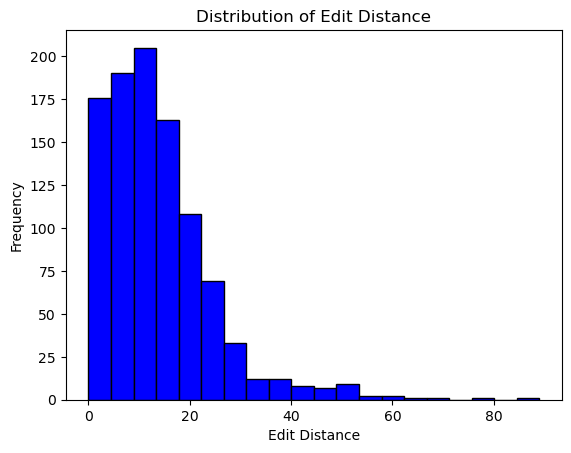

In [7]:
import matplotlib.pyplot as plt

plt.hist(df["Edit_Distance"], bins=20, color="blue", edgecolor="black")
plt.title("Distribution of Edit Distance")
plt.xlabel("Edit Distance")
plt.ylabel("Frequency")
plt.show()

In [8]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import TanimotoSimilarity

# 1. Создание словаря допустимых меток для каждой последовательности
valid_labels_dict = df.groupby("Sequence")["True_Label"].apply(set).to_dict()

def calculate_tanimoto_similarity(row):
    try:
        # Получаем предсказанную метку
        mol_pred = Chem.MolFromSmiles(row["Predicted_Label"])
        if mol_pred is None:
            return 0.0
        
        # Получаем все допустимые истинные метки для данной последовательности
        sequence = row["Sequence"]
        true_labels = valid_labels_dict.get(sequence, set())
        
        # Вычисляем Tanimoto Similarity для всех допустимых меток
        max_similarity = 0.0
        for true_label in true_labels:
            mol_true = Chem.MolFromSmiles(true_label)
            if mol_true is not None:
                fp_true = AllChem.GetMorganFingerprint(mol_true, 2)
                fp_pred = AllChem.GetMorganFingerprint(mol_pred, 2)
                similarity = TanimotoSimilarity(fp_true, fp_pred)
                max_similarity = max(max_similarity, similarity)
        
        return max_similarity
    except Exception as e:
        print(f"Error calculating similarity: {e}")
        return 0.0

# 2. Добавляем столбец с максимальным Tanimoto Similarity
df["Tanimoto_Similarity"] = df.apply(calculate_tanimoto_similarity, axis=1)

# 3. Определяем, является ли предсказание допустимым
df["Is_Acceptable"] = df["Tanimoto_Similarity"] >= 0.8  # Пороговое значение

[23:48:44] SMILES Parse Error: syntax error while parsing: =C(Oc(=1ccc((1)Nccccc1)c1cccc-c2ccccCl)cc2)cc1
[23:48:44] SMILES Parse Error: check for mistakes around position 1:
[23:48:44] =C(Oc(=1ccc((1)Nccccc1)c1cccc-c2ccccCl)cc
[23:48:44] ^
[23:48:44] SMILES Parse Error: Failed parsing SMILES '=C(Oc(=1ccc((1)Nccccc1)c1cccc-c2ccccCl)cc2)cc1' for input: '=C(Oc(=1ccc((1)Nccccc1)c1cccc-c2ccccCl)cc2)cc1'
[23:48:44] SMILES Parse Error: syntax error while parsing: CC[CC[C@H(C2c(c(ccO)ccc[C@H](OC@HH](C)[[C@@](OC@@](O(=
[23:48:44] SMILES Parse Error: check for mistakes around position 5:
[23:48:44] CC[CC[C@H(C2c(c(ccO)ccc[C@H](OC@HH](C)[[C
[23:48:44] ~~~~^
[23:48:44] SMILES Parse Error: Failed parsing SMILES 'CC[CC[C@H(C2c(c(ccO)ccc[C@H](OC@HH](C)[[C@@](OC@@](O(=' for input: 'CC[CC[C@H(C2c(c(ccO)ccc[C@H](OC@HH](C)[[C@@](OC@@](O(='
[23:48:44] SMILES Parse Error: syntax error while parsing: CcC@]12O[C@H](C[C@]1(O)CO)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)CNC4=O
[23:48:44] SMILES Parse Error: check for

In [9]:
acceptable_predictions = df["Is_Acceptable"].sum()
total_predictions = len(df)
acceptable_ratio = acceptable_predictions / total_predictions * 100

print(f"Acceptable Predictions: {acceptable_predictions}")
print(f"Total Predictions: {total_predictions}")
print(f"Acceptable Ratio: {acceptable_ratio:.2f}%")

Acceptable Predictions: 19
Total Predictions: 1000
Acceptable Ratio: 1.90%


In [10]:
errors = df[df["Is_Acceptable"] == False]
print(errors[["True_Label", "Predicted_Label", "Edit_Distance"]].head())

                                          True_Label  \
0   O=C(NCC(c1ccccc1)n1ccnc1)c1ccc(-c2ccc(Cl)cc2)cc1   
1  CN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](O)CC[C@H]...   
2  C[C@]12O[C@H](C[C@]1(O)CO)n1c3ccccc3c3c4c(c5c6...   
3  CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1...   
4  COc1cc2ncnc(Oc3cccc(NC(=O)Nc4cc(-c5ccccc5)on4)...   

                                     Predicted_Label  Edit_Distance  
0     =C(Oc(=1ccc((1)Nccccc1)c1cccc-c2ccccCl)cc2)cc1             12  
1  CC[CC[C@H(C2c(c(ccO)ccc[C@H](OC@HH](C)[[C@@](O...             26  
2  CcC@]12O[C@H](C[C@]1(O)CO)n1c3ccccc3c3c4c(c5c6...              1  
3  CcC@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1(...              2  
4  COc1cc2ccnc(Nc3cccc(NC(=O)Nc4cc(Cc5ccc((nn4)c3...              8  


# Проверим валидность предсказанных молекул независисмо от эталонов

1. Проверка химической валидности

Молекула считается химически валидной, если она может быть успешно преобразована в объект Mol с помощью функции Chem.MolFromSmiles. Если преобразование возвращает None, это означает, что SMILES-строка невалидна.

In [13]:
def is_valid_smiles(smiles):
    """
    Проверяет, является ли строка SMILES химически валидной.
    Возвращает True, если валидна, и False в противном случае.
    """
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None

# Добавляем столбец с результатами проверки валидности
df["Is_Valid"] = df["Predicted_Label"].apply(is_valid_smiles)


[23:49:36] SMILES Parse Error: syntax error while parsing: =C(Oc(=1ccc((1)Nccccc1)c1cccc-c2ccccCl)cc2)cc1
[23:49:36] SMILES Parse Error: check for mistakes around position 1:
[23:49:36] =C(Oc(=1ccc((1)Nccccc1)c1cccc-c2ccccCl)cc
[23:49:36] ^
[23:49:36] SMILES Parse Error: Failed parsing SMILES '=C(Oc(=1ccc((1)Nccccc1)c1cccc-c2ccccCl)cc2)cc1' for input: '=C(Oc(=1ccc((1)Nccccc1)c1cccc-c2ccccCl)cc2)cc1'
[23:49:36] SMILES Parse Error: syntax error while parsing: CC[CC[C@H(C2c(c(ccO)ccc[C@H](OC@HH](C)[[C@@](OC@@](O(=
[23:49:36] SMILES Parse Error: check for mistakes around position 5:
[23:49:36] CC[CC[C@H(C2c(c(ccO)ccc[C@H](OC@HH](C)[[C
[23:49:36] ~~~~^
[23:49:36] SMILES Parse Error: Failed parsing SMILES 'CC[CC[C@H(C2c(c(ccO)ccc[C@H](OC@HH](C)[[C@@](OC@@](O(=' for input: 'CC[CC[C@H(C2c(c(ccO)ccc[C@H](OC@HH](C)[[C@@](OC@@](O(='
[23:49:36] SMILES Parse Error: syntax error while parsing: CcC@]12O[C@H](C[C@]1(O)CO)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)CNC4=O
[23:49:36] SMILES Parse Error: check for

In [14]:
valid_predictions = df["Is_Valid"].sum()
total_predictions = len(df)
valid = valid_predictions / total_predictions * 100
print(f'valid_predictions: {valid_predictions}')
print(f'valid: {valid}')


valid_predictions: 30
valid: 3.0


2. Вычисление физико-химических свойств

Если молекула валидна, можно вычислить её физико-химические свойства, такие как LogP (гидрофобность) и молекулярная масса. Эти свойства могут быть полезны для оценки качества сгенерированных молекул.

In [15]:
from rdkit.Chem import Descriptors

def calculate_properties(smiles):
    """
    Вычисляет физико-химические свойства молекулы.
    Возвращает словарь с LogP и молекулярной массой, или None, если молекула невалидна.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    logp = Descriptors.MolLogP(mol)
    mol_weight = Descriptors.MolWt(mol)
    return {"LogP": logp, "Molecular Weight": mol_weight}

# Добавляем столбцы с физико-химическими свойствами
df["Properties"] = df["Predicted_Label"].apply(calculate_properties)

# Разделяем свойства на отдельные столбцы
df["LogP"] = df["Properties"].apply(lambda x: x["LogP"] if x else None)
df["Molecular_Weight"] = df["Properties"].apply(lambda x: x["Molecular Weight"] if x else None)

[23:50:44] SMILES Parse Error: syntax error while parsing: =C(Oc(=1ccc((1)Nccccc1)c1cccc-c2ccccCl)cc2)cc1
[23:50:44] SMILES Parse Error: check for mistakes around position 1:
[23:50:44] =C(Oc(=1ccc((1)Nccccc1)c1cccc-c2ccccCl)cc
[23:50:44] ^
[23:50:44] SMILES Parse Error: Failed parsing SMILES '=C(Oc(=1ccc((1)Nccccc1)c1cccc-c2ccccCl)cc2)cc1' for input: '=C(Oc(=1ccc((1)Nccccc1)c1cccc-c2ccccCl)cc2)cc1'
[23:50:44] SMILES Parse Error: syntax error while parsing: CC[CC[C@H(C2c(c(ccO)ccc[C@H](OC@HH](C)[[C@@](OC@@](O(=
[23:50:44] SMILES Parse Error: check for mistakes around position 5:
[23:50:44] CC[CC[C@H(C2c(c(ccO)ccc[C@H](OC@HH](C)[[C
[23:50:44] ~~~~^
[23:50:44] SMILES Parse Error: Failed parsing SMILES 'CC[CC[C@H(C2c(c(ccO)ccc[C@H](OC@HH](C)[[C@@](OC@@](O(=' for input: 'CC[CC[C@H(C2c(c(ccO)ccc[C@H](OC@HH](C)[[C@@](OC@@](O(='
[23:50:44] SMILES Parse Error: syntax error while parsing: CcC@]12O[C@H](C[C@]1(O)CO)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)CNC4=O
[23:50:44] SMILES Parse Error: check for

In [17]:
df[df['Is_Valid'] == True]

,Sequence,True_Label,Predicted_Label,Is_Correct,Edit_Distance,Tanimoto_Similarity,Is_Acceptable,Is_Valid,Properties,LogP,Molecular_Weight
15,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,Cc1cc2ccnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,False,2,0.701923,False,True,"{'LogP': 5.180420000000004, 'Molecular Weight'...",5.18042,429.923
31,MGGCEVREFLLQFGFFLPLLTAWPGDCSHVSNNQVVLLDTTTVLGE...,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,Cc1cc2ccnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,False,2,0.701923,False,True,"{'LogP': 5.180420000000004, 'Molecular Weight'...",5.18042,429.923
36,MAALSGGGGGGAEPGQALFNGDMEPEAGAGAGAAASSAADPAIPEE...,COc1cc2c(Sc3cccc(NC(=O)Nc4cc(C(C)(C)C)on4)c3)n...,COc1cc2c(Oc3cccc(NC(=O)Nc4cc(C(C)(C)C)n4)c3)nc...,False,3,0.605442,False,True,"{'LogP': 6.089800000000005, 'Molecular Weight'...",6.08980,545.640
55,MSSARTPLPTLNERDTEQPTLGHLDSKPSSKSNMIRGRNSATSADE...,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,CCN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc...,False,1,0.898148,True,True,"{'LogP': 4.744100000000003, 'Molecular Weight'...",4.74410,480.568
85,MSVLGEYERHCDSINSDFGSESGGCGDSSPGPSASQGPRAGGGAAE...,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,CCN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc...,False,1,0.898148,True,True,"{'LogP': 4.744100000000003, 'Molecular Weight'...",4.74410,480.568
123,MRRLSSWRKMATAEKQKHDGRVKIGHYILGDTLGVGTFGKVKVGKH...,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,CCN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc...,False,1,0.898148,True,True,"{'LogP': 4.744100000000003, 'Molecular Weight'...",4.74410,480.568
166,MAQISSNSGFKECPSSHPEPTRAKDVDKEEALQMEAEALAKLQKDR...,Cc1nc2c(N)cc(N3CCOCC3)nn2c1Cc1cccc(C(F)(F)F)c1C,Cc1cc2c(N)cc(N3CCOCC3)nn2c1Nc1cccc(C(F)(F)F)c1CN,False,3,0.627273,False,True,"{'LogP': 3.2826200000000005, 'Molecular Weight...",3.28262,420.439
265,MELENYKQPVVLREDNCRRRRRMKPRSAAASLSSMELIPIEFVLPT...,Cc1nc2c(N)cc(N3CCOCC3)nn2c1Nc1cccc(C(F)(F)F)c1...,Cc1cc2c(N)cc(N3CCOCC3)nn2c1Nc1cccc(C(F)(F)F)c1...,False,3,0.714286,False,True,"{'LogP': 4.170720000000003, 'Molecular Weight'...",4.17072,518.584
296,MLEICLKLVGCKSKKGLSSSSSCYLEEALQRPVASDFEPQGLSEAA...,Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(OCCN3CCO...,Cc1ccc(Nn2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(OCCN3CCO...,False,1,0.845528,True,True,"{'LogP': 5.872420000000005, 'Molecular Weight'...",5.87242,542.684
355,MAALSGGGGGGAEPGQALFNGDMEPEAGAGAGAAASSAADPAIPEE...,COc1cc2ncnc(Oc3cccc(NC(=O)Nc4cc(C(C)(C)C)on4)c...,COc1cc2ccnc(Nc3cccc(NC(=O)Nc4cc(C(C)(C)C)on4)c...,False,6,0.565789,False,True,"{'LogP': 6.363600000000005, 'Molecular Weight'...",6.36360,574.682


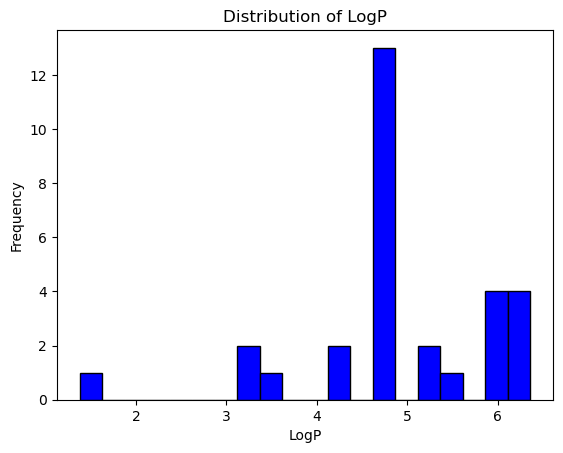

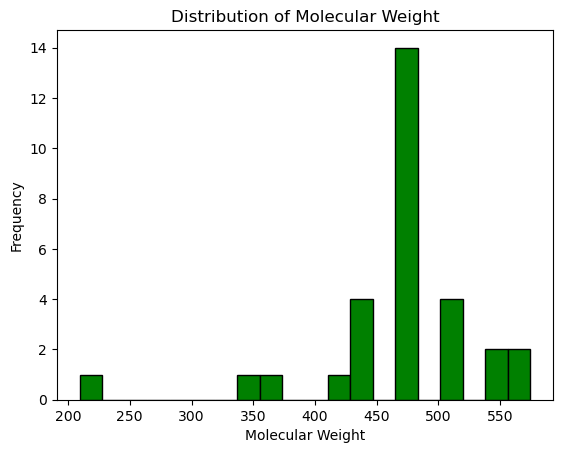

In [18]:
import matplotlib.pyplot as plt

plt.hist(df["LogP"].dropna(), bins=20, color="blue", edgecolor="black")
plt.title("Distribution of LogP")
plt.xlabel("LogP")
plt.ylabel("Frequency")
plt.show()

plt.hist(df["Molecular_Weight"].dropna(), bins=20, color="green", edgecolor="black")
plt.title("Distribution of Molecular Weight")
plt.xlabel("Molecular Weight")
plt.ylabel("Frequency")
plt.show()

In [19]:
from molecule_evaluator import MoleculeEvaluator
from data.constants import T5_V3_OUTPUT_FILE_PATH

[00:20:30] SMILES Parse Error: syntax error while parsing: =C(Oc(=1ccc((1)Nccccc1)c1cccc-c2ccccCl)cc2)cc1
[00:20:30] SMILES Parse Error: check for mistakes around position 1:
[00:20:30] =C(Oc(=1ccc((1)Nccccc1)c1cccc-c2ccccCl)cc
[00:20:30] ^
[00:20:30] SMILES Parse Error: Failed parsing SMILES '=C(Oc(=1ccc((1)Nccccc1)c1cccc-c2ccccCl)cc2)cc1' for input: '=C(Oc(=1ccc((1)Nccccc1)c1cccc-c2ccccCl)cc2)cc1'
[00:20:30] SMILES Parse Error: syntax error while parsing: CC[CC[C@H(C2c(c(ccO)ccc[C@H](OC@HH](C)[[C@@](OC@@](O(=
[00:20:30] SMILES Parse Error: check for mistakes around position 5:
[00:20:30] CC[CC[C@H(C2c(c(ccO)ccc[C@H](OC@HH](C)[[C
[00:20:30] ~~~~^
[00:20:30] SMILES Parse Error: Failed parsing SMILES 'CC[CC[C@H(C2c(c(ccO)ccc[C@H](OC@HH](C)[[C@@](OC@@](O(=' for input: 'CC[CC[C@H(C2c(c(ccO)ccc[C@H](OC@HH](C)[[C@@](OC@@](O(='
[00:20:30] SMILES Parse Error: syntax error while parsing: CcC@]12O[C@H](C[C@]1(O)CO)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)CNC4=O
[00:20:30] SMILES Parse Error: check for

Results saved to /Users/holodkovaelizavetaigorevna/graduate_work/BioMol-Generator/check_results/check-t5_v3_test.csv


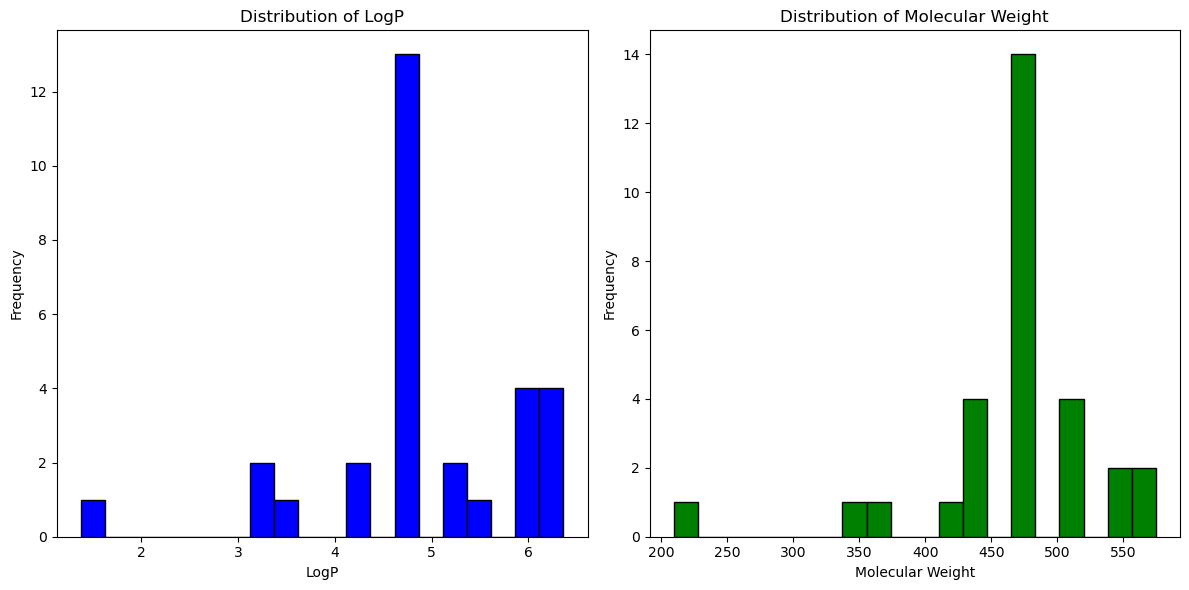

Summary Statistics:
Valid_Molecules: 30
Total_Molecules: 1000
Valid_Ratio: 3.00
Acceptable_Molecules: 19
Acceptable_Ratio: 1.90


In [21]:
if __name__ == "__main__":
    # Укажите пути к файлам
    input_file=str(T5_V3_OUTPUT_FILE_PATH)
    output_file=str(T5_V3_OUTPUT_FILE_PATH.parents[2] / 'check_results' / f'check-{T5_V3_OUTPUT_FILE_PATH.name}')

    # Создайте экземпляр класса
    evaluator = MoleculeEvaluator(input_file, output_file)

    # Запустите анализ
    summary, results_df = evaluator.run()

    # Выведите сводную статистику
    print("Summary Statistics:")
    for key, value in summary.items():
        print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

In [24]:
results_df[results_df['Is_Valid'] == True]

,Sequence,True_Label,Predicted_Label,Is_Valid,Properties,LogP,Molecular_Weight,Tanimoto_Similarity,Is_Acceptable
15,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,Cc1cc2ccnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,True,"{'LogP': 5.180420000000004, 'Molecular Weight'...",5.18042,429.923,0.701923,False
31,MGGCEVREFLLQFGFFLPLLTAWPGDCSHVSNNQVVLLDTTTVLGE...,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,Cc1cc2ccnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,True,"{'LogP': 5.180420000000004, 'Molecular Weight'...",5.18042,429.923,0.701923,False
36,MAALSGGGGGGAEPGQALFNGDMEPEAGAGAGAAASSAADPAIPEE...,COc1cc2c(Sc3cccc(NC(=O)Nc4cc(C(C)(C)C)on4)c3)n...,COc1cc2c(Oc3cccc(NC(=O)Nc4cc(C(C)(C)C)n4)c3)nc...,True,"{'LogP': 6.089800000000005, 'Molecular Weight'...",6.08980,545.640,0.605442,False
55,MSSARTPLPTLNERDTEQPTLGHLDSKPSSKSNMIRGRNSATSADE...,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,CCN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc...,True,"{'LogP': 4.744100000000003, 'Molecular Weight'...",4.74410,480.568,0.898148,True
85,MSVLGEYERHCDSINSDFGSESGGCGDSSPGPSASQGPRAGGGAAE...,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,CCN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc...,True,"{'LogP': 4.744100000000003, 'Molecular Weight'...",4.74410,480.568,0.898148,True
123,MRRLSSWRKMATAEKQKHDGRVKIGHYILGDTLGVGTFGKVKVGKH...,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,CCN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc...,True,"{'LogP': 4.744100000000003, 'Molecular Weight'...",4.74410,480.568,0.898148,True
166,MAQISSNSGFKECPSSHPEPTRAKDVDKEEALQMEAEALAKLQKDR...,Cc1nc2c(N)cc(N3CCOCC3)nn2c1Cc1cccc(C(F)(F)F)c1C,Cc1cc2c(N)cc(N3CCOCC3)nn2c1Nc1cccc(C(F)(F)F)c1CN,True,"{'LogP': 3.2826200000000005, 'Molecular Weight...",3.28262,420.439,0.627273,False
265,MELENYKQPVVLREDNCRRRRRMKPRSAAASLSSMELIPIEFVLPT...,Cc1nc2c(N)cc(N3CCOCC3)nn2c1Nc1cccc(C(F)(F)F)c1...,Cc1cc2c(N)cc(N3CCOCC3)nn2c1Nc1cccc(C(F)(F)F)c1...,True,"{'LogP': 4.170720000000003, 'Molecular Weight'...",4.17072,518.584,0.714286,False
296,MLEICLKLVGCKSKKGLSSSSSCYLEEALQRPVASDFEPQGLSEAA...,Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(OCCN3CCO...,Cc1ccc(Nn2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(OCCN3CCO...,True,"{'LogP': 5.872420000000005, 'Molecular Weight'...",5.87242,542.684,0.845528,True
355,MAALSGGGGGGAEPGQALFNGDMEPEAGAGAGAAASSAADPAIPEE...,COc1cc2ncnc(Oc3cccc(NC(=O)Nc4cc(C(C)(C)C)on4)c...,COc1cc2ccnc(Nc3cccc(NC(=O)Nc4cc(C(C)(C)C)on4)c...,True,"{'LogP': 6.363600000000005, 'Molecular Weight'...",6.36360,574.682,0.565789,False
